In [4]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($),Gender
0,Rob,27,70000,male
1,Bob,29,90000,male
2,Luci,29,61000,female
3,Joy,28,60000,male
4,Sky,42,150000,female
5,Gautam,39,155000,male
6,Raj,41,160000,male
7,Roja,38,162000,female
8,Ranbir,36,156000,male
9,Tom,35,130000,male


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

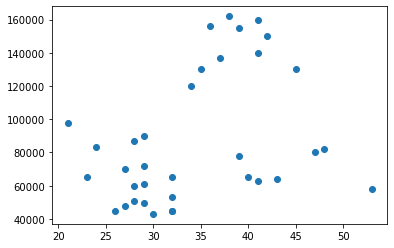

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [7]:
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2])

In [8]:
df['cluster'] = y_predict
df.tail()

,Name,Age,Income($),Gender,cluster
30,Jon,32,45000,male,2
31,sam,28,87000,male,1
32,Walker,29,72000,male,1
33,Hema,32,65000,female,2
34,Spoorthi,30,43000,female,2


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

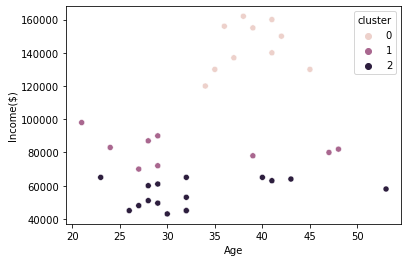

In [13]:
#Using seaborn to plot different clusters

sns.scatterplot(df['Age'],df['Income($)'], hue = df['cluster'])

In [17]:
#Using matplotlib to plot different clusters

df1 = df[df.cluster == 0]
df1

df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


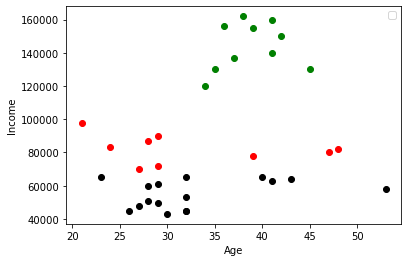

In [18]:
plt.scatter(df1['Age'], df1['Income($)'], color ='green')
plt.scatter(df2['Age'], df2['Income($)'], color ='red')
plt.scatter(df3['Age'], df3['Income($)'], color ='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Income($)']
scaler.fit(df[features])
df['Income($)'] =scaler.transform(df[features])
df.head()

,Name,Age,Income($),Gender,cluster
0,Rob,27,0.226891,male,1
1,Bob,29,0.394958,male,1
2,Luci,29,0.151261,female,2
3,Joy,28,0.142857,male,2
4,Sky,42,0.899160,female,0


In [20]:
scaler = MinMaxScaler()
features = ['Age']
scaler.fit(df[features])
df['Age'] =scaler.transform(df[features])
df.head()

,Name,Age,Income($),Gender,cluster
0,Rob,0.18750,0.226891,male,1
1,Bob,0.25000,0.394958,male,1
2,Luci,0.25000,0.151261,female,2
3,Joy,0.21875,0.142857,male,2
4,Sky,0.65625,0.899160,female,0


In [21]:
km = KMeans(n_clusters = 3)
y_predict =km.fit_predict(df[['Age','Income($)']])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [24]:
df['cluster'] = y_predict
df.tail()

,Name,Age,Income($),Gender,cluster
30,Jon,0.34375,0.016807,male,0
31,sam,0.21875,0.369748,male,0
32,Walker,0.25000,0.243697,male,0
33,Hema,0.34375,0.184874,female,0
34,Spoorthi,0.28125,0.000000,female,0


In [25]:
km.cluster_centers_

array([[0.22222222, 0.16643324],
       [0.55625   , 0.8487395 ],
       [0.73214286, 0.22689076]])

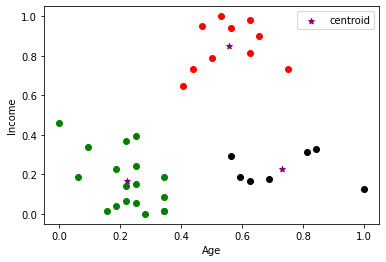

In [27]:
df1 = df[df.cluster == 0]
df1

df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]


plt.scatter(df1['Age'], df1['Income($)'], color ='green')
plt.scatter(df2['Age'], df2['Income($)'], color ='red')
plt.scatter(df3['Age'], df3['Income($)'], color ='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [28]:
k_rng = range(1,10)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.708753283351156,
 2.2851486642451095,
 0.9562308716378707,
 0.6399754025225445,
 0.5125185891446198,
 0.39412650542037386,
 0.326914522150175,
 0.261439553992553,
 0.22826964540411754]

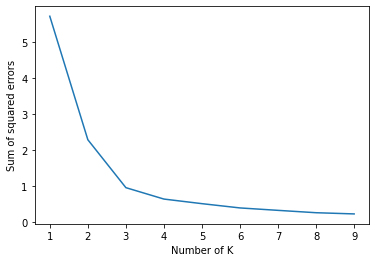

In [29]:
plt.xlabel('Number of K')
plt.ylabel("Sum of squared errors")
plt.plot(k_rng,sse)